In [1]:
#Import Libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Import Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\david\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Filter for job title and region

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [3]:
#Remove missing values for salary

df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

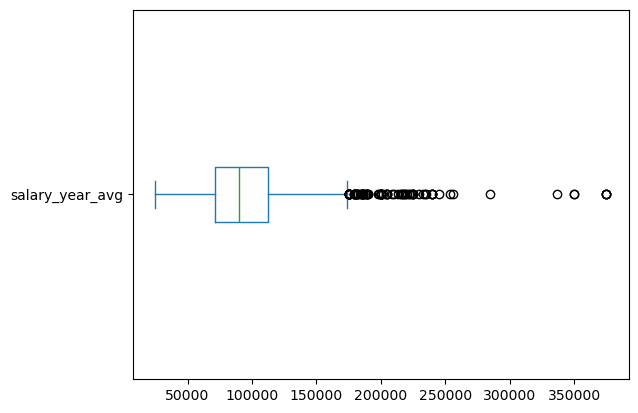

In [5]:
#Create boxplot

df_DA_US['salary_year_avg'].plot(kind = 'box', vert = False)
plt.show()

In [6]:
#Plot by specific job titles

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

#Filter data

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset = ['salary_year_avg'])

#Create list of salaries for each job title

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

C:\Users\david\AppData\Local\Temp\ipykernel_15544\3775088758.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert = False)


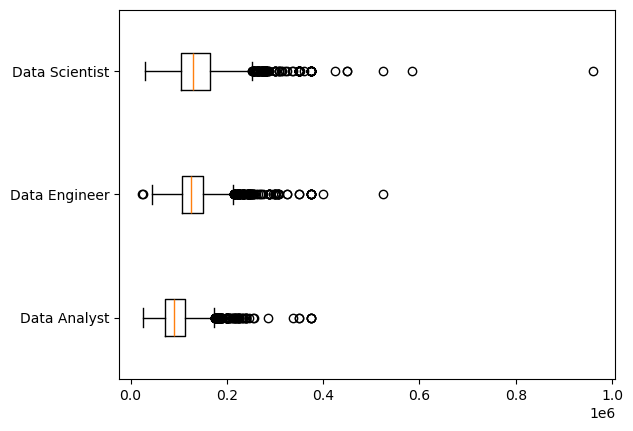

In [7]:
#Create boxplot

plt.boxplot(job_list, labels = job_titles, vert = False)
plt.show()

C:\Users\david\AppData\Local\Temp\ipykernel_15544\3422317959.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert = False)


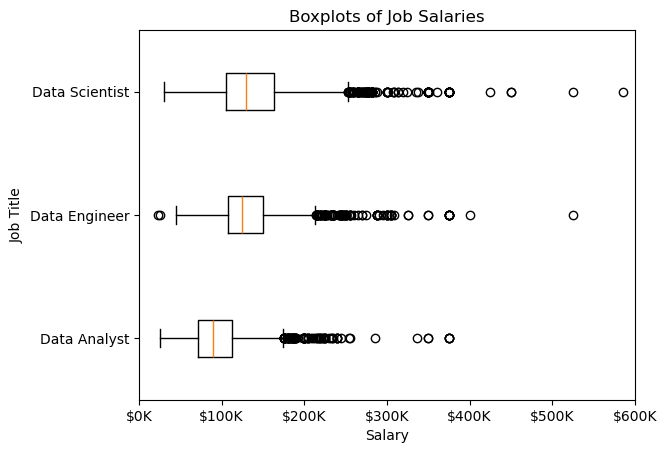

In [9]:
#Extra formatting

plt.boxplot(job_list, labels = job_titles, vert = False)
plt.title('Boxplots of Job Salaries')
plt.xlabel('Salary')
plt.ylabel('Job Title')
plt.xlim(0, 600000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.show()